# **Entrenamiento con modelos básico y fine-tuning**

Definiremos los seis modelos diferentes empleando los modelos pre-entrenados VGG16, VGG19, NasNetLarge, InceptionResNetV2, ResNet50 y Xception. Sobre los que aplicaremos la técnica de fine-tuning, consistente en descongelar las últimas capas del modelo pre-entrenado para ajustar nuevamente sus pesos.

## **Importar dataset**

In [ ]:
import kagglehub    # Libreria para la descarga de archivos de kaggle

# Download latest version
path = kagglehub.dataset_download("gpiosenka/railway-track-fault-detection-resized-224-x-224")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/railway-track-fault-detection-resized-224-x-224


## **Directorios**

In [ ]:
# Necesitaremos la librería os, que nos permite interactuar con el sistema operativo y manipular rutas.
import os

# Directorio de entrenamiento:
train_dir = os.path.join(path, 'train')
# Directorio de pruebas:
test_dir = os.path.join(path, 'test')
# Directorio de validacion:
valid_dir = os.path.join(path, 'valid')

## **Importar modelos**

In [ ]:
# Los modelos pre-entrenados se encontrarán en la librería de tensorflow.
import tensorflow as tf

# Aprovechamos para fijar la semilla y evitar la aleatoriedad entre simulaciones.
import os
import random
import numpy as np

# Fijar semillas
Semilla = 42
os.environ['PYTHONHASHSEED'] = str(Semilla) # Controlamos la aleatoridad en el hashing de objetos.
random.seed(Semilla)                        # Controlamos la aleatoridad en la generación de números aleatorios.
np.random.seed(Semilla)                     # Controlamos la aleatoridad en la generación de números aleatorios en numpy.
tf.random.set_seed(Semilla)                 # Controlamos la aleatoridad en la generación de números aleatorios en tensorflow.

# Configurar comportamiento determinista en TensorFlow
os.environ['TF_DETERMINISTIC_OPS'] = '1'    # Configuramos una variable de entorno destinada a ciertas operaciones no deterministas como deterministas.

### VGG16

In [ ]:
VGG16_Base = (tf.keras.applications.VGG16(include_top=False,          # Eliminamos su clasificador.
                                          weights='imagenet',         # Mantenemos los pesos de cada capa.
                                          input_shape=(224, 224, 3))) # Especificamos el tamaño de los datos de entrada.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in VGG16_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
VGG16_Base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### VGG19

In [ ]:
VGG19_Base = (tf.keras.applications.VGG19(include_top=False,
                                          weights='imagenet',
                                          input_shape=(224, 224, 3)))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in VGG19_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
VGG19_Base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

### NasNetLarge

In [ ]:
NasNetLarge_Base = (tf.keras.applications.NASNetLarge(include_top=False,
                                                      weights='imagenet',
                                                      input_shape=(224, 224, 3)))

343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [ ]:
# Congelamos el modelo
for layer in NasNetLarge_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
NasNetLarge_Base.summary()

Model: "nasnet_large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │      2,592 │ input_layer_2[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        384 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │      4,032 │ activation[0][0]  │
│ (Conv2D)            │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │        168 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_1[0][… │
│ (ZeroPadding2D)     │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_3[0][… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      2,814 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      8,736 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │      2,814 │ activation_2[0][

 Total params: 84,916,818 (323.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 84,916,818 (323.93 MB)

### InceptionResNetV2

In [ ]:
InceptionResNetV2_Base = (tf.keras.applications.InceptionResNetV2(include_top=False,
                                                                  weights='imagenet',
                                                                  input_shape=(224, 224, 3)))

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
# Congelamos el modelo
for layer in InceptionResNetV2_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
InceptionResNetV2_Base.summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_260      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation_260[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_261      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_261[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_262      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_262[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_263      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_263[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_264      │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,336,736 (207.28 MB)

### ResNet50

In [ ]:
ResNet50_Base = (tf.keras.applications.ResNet50(include_top=False,
                                                weights='imagenet',
                                                input_shape=(224, 224, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Congelamos el modelo
for layer in ResNet50_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
ResNet50_Base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

### Xception

In [ ]:
Xception_Base = (tf.keras.applications.Xception(include_top=False,
                                                weights='imagenet',
                                                input_shape=(224, 224, 3)))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Congelamos el modelo
for layer in Xception_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
Xception_Base.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_203 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_203[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_4[0][0]     

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

## **Entrenamiento**

### Datos de entrada

In [ ]:
# Importamos la clase ImageDataGenerator contenido en Keras.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

# Definimos los generadores para cada uno de los conjuntos.
train_data = datagen.flow_from_directory(
    train_dir,                 # Directorio de datos original.
    batch_size=32,             # Cantidad de datos por iteración.
    class_mode='categorical',  # Tipo categórico (defectuoso y no defectuoso).
    color_mode="rgb",          # Escala de colores.
    target_size=(224, 224),    # Tamaño de los datos a la salida.
    subset='training'          # Nombre del subset originado.
)
validation_data = datagen.flow_from_directory(
    valid_dir,                 # Directorio de datos original.
    batch_size=32,             # Cantidad de datos por iteración.
    class_mode='categorical',  # Tipo categórico (defectuoso y no defectuoso).
    color_mode="rgb",          # Escala de colores.
    target_size=(224, 224),    # Tamaño de los datos a la salida.
    shuffle=False              # Mezcla de los datos.
)
test_data = datagen.flow_from_directory(
    test_dir,                  # Directorio de datos original.
    batch_size=32,             # Cantidad de datos por iteración.
    class_mode='categorical',  # Tipo categórico (defectuoso y no defectuoso).
    color_mode="rgb",          # Escala de colores.
    target_size=(224, 224),    # Tamaño de los datos a la salida.
    shuffle=False              # Mezcla de los datos.
)

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


### Modelo VGG16

In [ ]:
# Creamos un modelo nuevo.
VGG16_s = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
VGG16_s.add(VGG16_Base)

# Añadimos el clasificador categórico.
VGG16_s.add(tf.keras.layers.Flatten())
VGG16_s.add(tf.keras.layers.Dense(500, activation='relu'))
VGG16_s.add(tf.keras.layers.Dense(200, activation='relu'))
VGG16_s.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
VGG16_s.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    12,544,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,359,790 (104.37 MB)

 Trainable params: 12,645,102 (48.24 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Modelo VGG19

In [ ]:
# Creamos un modelo nuevo.
VGG19_s = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
VGG19_s.add(VGG19_Base)

# Añadimos el clasificador categórico.
VGG19_s.add(tf.keras.layers.Flatten())
VGG19_s.add(tf.keras.layers.Dense(500, activation='relu'))
VGG19_s.add(tf.keras.layers.Dense(200, activation='relu'))
VGG19_s.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
VGG19_s.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │    12,544,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,669,486 (124.62 MB)

 Trainable params: 12,645,102 (48.24 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

### Modelo NASNetLarge

In [ ]:
# Creamos un modelo nuevo.
NasNetLarge_s = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
NasNetLarge_s.add(NasNetLarge_Base)

# Añadimos el clasificador categórico.
NasNetLarge_s.add(tf.keras.layers.Flatten())
NasNetLarge_s.add(tf.keras.layers.Dense(500, activation='relu'))
NasNetLarge_s.add(tf.keras.layers.Dense(200, activation='relu'))
NasNetLarge_s.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
NasNetLarge_s.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_large (Functional)       │ (None, 7, 7, 4032)     │    84,916,818 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 197568)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │    98,784,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,801,920 (701.15 MB)

 Trainable params: 98,885,102 (377.22 MB)

 Non-trainable params: 84,916,818 (323.93 MB)

### Modelo InceptionResNetV2

In [ ]:
# Creamos un modelo nuevo.
InceptionResNetV2_s = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
InceptionResNetV2_s.add(InceptionResNetV2_Base)

# Añadimos el clasificador categórico.
InceptionResNetV2_s.add(tf.keras.layers.Flatten())
InceptionResNetV2_s.add(tf.keras.layers.Dense(500, activation='relu'))
InceptionResNetV2_s.add(tf.keras.layers.Dense(200, activation='relu'))
InceptionResNetV2_s.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
InceptionResNetV2_s.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 5, 5, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │    19,200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,637,838 (280.91 MB)

 Trainable params: 19,301,102 (73.63 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

### Modelo ResNet50

In [ ]:
# Creamos un modelo nuevo.
ResNet50_s = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
ResNet50_s.add(ResNet50_Base)

# Añadimos el clasificador categórico.
ResNet50_s.add(tf.keras.layers.Flatten())
ResNet50_s.add(tf.keras.layers.Dense(500, activation='relu'))
ResNet50_s.add(tf.keras.layers.Dense(200, activation='relu'))
ResNet50_s.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
ResNet50_s.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │    50,176,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,864,814 (281.77 MB)

 Trainable params: 50,277,102 (191.79 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Modelo Xception

In [ ]:
# Creamos un modelo nuevo.
Xception_s = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
Xception_s.add(Xception_Base)

# Añadimos el clasificador categórico
Xception_s.add(tf.keras.layers.Flatten())
Xception_s.add(tf.keras.layers.Dense(500, activation='relu'))
Xception_s.add(tf.keras.layers.Dense(200, activation='relu'))
Xception_s.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
Xception_s.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 500)            │    50,176,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,138,582 (271.37 MB)

 Trainable params: 50,277,102 (191.79 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

### Simulación

In [ ]:
# Para realizar la simulación o entrenamiento emplearemos dos librerías.
from keras import optimizers # Contiene optimizadores, encargados de ajustar los pesos.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,  Callback # Son algoritmos que ayudan a evitar que nuestro modelo entre en overfitting
import time

# Definimos tanto la reducción de learning rate como la parada prematura.
# La reducción de learning rate se encargará de determinar como de rápido debe aprender nuestro modelo.
rlr = ReduceLROnPlateau(monitor = 'val_loss', # Variable a monitorear.
                        factor = 0.1,         # Cuanto debe reducirse el lr. new_lr = lr*factor.
                        patience = 4,         # Número de épocas sin mejoras para que se reduzca el lr.
                        verbose = 1,          # Información de estado.
                        min_delta = 1e-5,     # Margen sobre el que se determina el nuevo óptimo.
                        min_lr = 1e-5,        # Learning rate minimo a alcanzar.
                        mode = 'min',         # Modo de actuación.
                        cooldown=1)           # Numero de epocas necesarias para volver a trabajar normalmente.

# Early stop moniteará la perdida de validacion, terminando el entrenamiento cuando se detecte que se acerca al overfitting.
early_stop = EarlyStopping(monitor = 'val_loss',        # Variable a monitorear.
                           min_delta = 1e-5,            # Mínimo cambio en la variable a monitorear para tomarlo como una mejora.
                           patience = 6,                # Número de épocas sin mejoras a partir de la cual se parará la simulación.
                           mode = 'min',                # Modo de trabajo.
                           restore_best_weights = True, # Restablece los pesos de la época en la que la variable monitoreada fue mejor.
                           verbose = 1)                 # Información de estado.

# Creamos la lista de callbacks.
callbacks_list = [early_stop, rlr]

#### VGG16

In [ ]:
# Compilamos el modelo antes definido.
VGG16_s.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['acc'])

# Realizamos el entrenamiento.
VGG16_start_time = time.time()
VGG16_s_history = VGG16_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 543ms/step - acc: 0.4530 - loss: 4.6576 - val_acc: 0.5000 - val_loss: 1.8464 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - acc: 0.5162 - loss: 1.6634 - val_acc: 0.7258 - val_loss: 0.8337 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - acc: 0.7639 - loss: 0.5690 - val_acc: 0.7903 - val_loss: 0.5338 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - acc: 0.8189 - loss: 0.4115 - val_acc: 0.8548 - val_loss: 0.3569 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - acc: 0.8355 - loss: 0.3408 - val_acc: 0.7742 - val_loss: 0.4574 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - acc: 0.9092 - loss: 0.1920 - val_acc: 0.8871 - val_loss: 0.3546 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - acc: 0.9568 - loss: 0.1295 - val_acc: 0.8387 - val_loss: 0.3654 - learning_rate: 0.0010
Epoch 

In [ ]:
# Ahora descongelamos las últimas capas y volvemos a simular.
for layer in VGG16_Base.layers[-2:]:
    layer.trainable = True

# Compilamos nuevamente el modelo
VGG16_s.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['acc'])

# Realizamos el entrenamiento.
VGG16_s_history = VGG16_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)
VGG16_end_time = time.time()
print(f"Tiempo de ejecución: {VGG16_end_time - VGG16_start_time} segundos")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - acc: 0.6641 - loss: 4.8551 - val_acc: 0.5806 - val_loss: 0.6411 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - acc: 0.6977 - loss: 0.5763 - val_acc: 0.8065 - val_loss: 0.4702 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - acc: 0.8512 - loss: 0.3820 - val_acc: 0.7903 - val_loss: 0.5194 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - acc: 0.9396 - loss: 0.1654 - val_acc: 0.7581 - val_loss: 0.6544 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - acc: 0.9880 - loss: 0.0464 - val_acc: 0.8387 - val_loss: 0.5758 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - acc: 0.9989 - loss: 0.0297
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - acc: 0.9987 - loss: 0.0292 - val_acc: 0.9032 - val_loss: 0.5243 - learning_rate: 0.0010
E

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
VGG16_s_acc = VGG16_s_history.history['acc']
VGG16_s_val_acc = VGG16_s_history.history['val_acc']
VGG16_s_loss = VGG16_s_history.history['loss']
VGG16_s_val_loss = VGG16_s_history.history['val_loss']

#### VGG19

In [ ]:
# Compilamos el modelo antes definido.
VGG19_s.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['acc'])

# Realizamos el entrenamiento.
VGG19_start_time = time.time()
VGG19_s_history = VGG19_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - acc: 0.5238 - loss: 3.2533 - val_acc: 0.6935 - val_loss: 0.7427 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - acc: 0.7886 - loss: 0.4662 - val_acc: 0.7742 - val_loss: 0.5284 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - acc: 0.8031 - loss: 0.3523 - val_acc: 0.7097 - val_loss: 0.6728 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - acc: 0.8997 - loss: 0.2612 - val_acc: 0.8065 - val_loss: 0.4546 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - acc: 0.9711 - loss: 0.1057 - val_acc: 0.7419 - val_loss: 0.5960 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - acc: 0.9918 - loss: 0.0629 - val_acc: 0.7419 - val_loss: 0.4991 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - acc: 0.9935 - loss: 0.0350 - val_acc: 0.7419 - val_loss: 0.4920 - learning_rate: 0.0010
Epoch 

In [ ]:
# Ahora descongelamos las últimas capas y volvemos a simular.
for layer in VGG19_Base.layers[-2:]:
    layer.trainable = True

# Compilamos nuevamente el modelo.
VGG19_s.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['acc'])

# Realizamos el entrenamiento.
VGG19_s_history = VGG19_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)
VGG19_end_time = time.time()
print(f"Tiempo de ejecución: {VGG19_end_time - VGG19_start_time} segundos")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - acc: 0.6786 - loss: 4.4180 - val_acc: 0.5645 - val_loss: 0.5988 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - acc: 0.7325 - loss: 0.5018 - val_acc: 0.8548 - val_loss: 0.4099 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - acc: 0.9000 - loss: 0.2746 - val_acc: 0.7419 - val_loss: 0.6482 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - acc: 0.9586 - loss: 0.1287 - val_acc: 0.7903 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - acc: 0.9757 - loss: 0.0648 - val_acc: 0.8710 - val_loss: 0.4923 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - acc: 0.9811 - loss: 0.0263
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - acc: 0.9819 - loss: 0.0252 - val_acc: 0.8065 - val_loss: 1.0352 - learning_rate: 0.0010
E

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
VGG19_s_acc = VGG19_s_history.history['acc']
VGG19_s_val_acc = VGG19_s_history.history['val_acc']
VGG19_s_loss = VGG19_s_history.history['loss']
VGG19_s_val_loss = VGG19_s_history.history['val_loss']

#### NASNetLarge

In [ ]:
# Compilamos el modelo antes definido.
NasNetLarge_s.compile(loss='categorical_crossentropy',
                      optimizer=optimizers.Adam(),
                      metrics=['acc'])

# Realizamos el entrenamiento.
NasNetLarge_start_time = time.time()
NasNetLarge_s_history = NasNetLarge_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - acc: 0.5006 - loss: 30.4749 - val_acc: 0.7419 - val_loss: 1.8844 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 716ms/step - acc: 0.7292 - loss: 3.7662 - val_acc: 0.7903 - val_loss: 1.4184 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 613ms/step - acc: 0.8784 - loss: 1.0053 - val_acc: 0.6290 - val_loss: 1.9141 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 623ms/step - acc: 0.9493 - loss: 0.2682 - val_acc: 0.7258 - val_loss: 3.2153 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 613ms/step - acc: 0.9513 - loss: 0.2317 - val_acc: 0.6613 - val_loss: 4.0283 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - acc: 0.9681 - loss: 0.1529
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 615ms/step - acc: 0.9700 - loss: 0.1438 - val_acc: 0.6774 - val_loss: 1.9909 - learning_rate: 0.0010


In [ ]:
# Ahora descongelamos las últimas capas y volvemos a simular.
for layer in NasNetLarge_Base.layers[-2:]:
    layer.trainable = True

# Compilamos nuevamente el modelo.
NasNetLarge_s.compile(loss='categorical_crossentropy',
                      optimizer=optimizers.Adam(),
                      metrics=['acc'])

# Realizamos el entrenamiento.
NasNetLarge_s_history = NasNetLarge_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)
NasNetLarge_end_time = time.time()
print(f"Tiempo de ejecución: {NasNetLarge_end_time - NasNetLarge_start_time} segundos")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - acc: 0.7878 - loss: 3.6113 - val_acc: 0.6613 - val_loss: 4.7242 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 765ms/step - acc: 0.8596 - loss: 1.2284 - val_acc: 0.6774 - val_loss: 2.7179 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step - acc: 0.9460 - loss: 0.2922 - val_acc: 0.6935 - val_loss: 3.7525 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step - acc: 0.9889 - loss: 0.1501 - val_acc: 0.6613 - val_loss: 5.5801 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 606ms/step - acc: 0.9716 - loss: 0.1874 - val_acc: 0.6774 - val_loss: 4.1051 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - acc: 0.9801 - loss: 0.1459
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 643ms/step - acc: 0.9810 - loss: 0.1383 - val_acc: 0.7258 - val_loss: 3.8380 - learning_rate: 0.0010
E

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
NasNetLarge_s_acc = NasNetLarge_s_history.history['acc']
NasNetLarge_s_val_acc = NasNetLarge_s_history.history['val_acc']
NasNetLarge_s_loss = NasNetLarge_s_history.history['loss']
NasNetLarge_s_val_loss = NasNetLarge_s_history.history['val_loss']

#### InceptionResNetV2

In [ ]:
# Compilamos el modelo antes definido.
InceptionResNetV2_s.compile(loss='categorical_crossentropy',
                            optimizer=optimizers.Adam(),
                            metrics=['acc'])

# Realizamos el entrenamiento.
InceptionResNetV2_start_time = time.time()
InceptionResNetV2_s_history = InceptionResNetV2_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.5042 - loss: 16.1956 - val_acc: 0.5968 - val_loss: 5.0590 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 378ms/step - acc: 0.5888 - loss: 4.5322 - val_acc: 0.5968 - val_loss: 3.3132 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 388ms/step - acc: 0.8198 - loss: 1.6454 - val_acc: 0.7581 - val_loss: 0.9828 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - acc: 0.9208 - loss: 0.2323 - val_acc: 0.7581 - val_loss: 0.6270 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - acc: 0.9747 - loss: 0.0562 - val_acc: 0.7097 - val_loss: 0.9353 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 322ms/step - acc: 0.9645 - loss: 0.1508 - val_acc: 0.8387 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - acc: 0.9790 - loss: 0.0439 - val_acc: 0.8065 - val_loss: 0.7914 - learning_rate: 0.0010
Epoch 

In [ ]:
# Ahora descongelamos las últimas capas y volvemos a simular.
for layer in InceptionResNetV2_Base.layers[-2:]:
    layer.trainable = True

# Compilamos nuevamente el modelo.
InceptionResNetV2_s.compile(loss='categorical_crossentropy',
                            optimizer=optimizers.Adam(),
                            metrics=['acc'])

# Realizamos el entrenamiento.
InceptionResNetV2_s_history = InceptionResNetV2_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)
InceptionResNetV2_end_time = time.time()
print(f"Tiempo de ejecución: {InceptionResNetV2_end_time - InceptionResNetV2_start_time} segundos")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.6698 - loss: 4.6321 - val_acc: 0.5806 - val_loss: 3.9244 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - acc: 0.7952 - loss: 0.9693 - val_acc: 0.5968 - val_loss: 3.1943 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - acc: 0.8929 - loss: 0.4980 - val_acc: 0.8065 - val_loss: 0.7994 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 323ms/step - acc: 0.9471 - loss: 0.1436 - val_acc: 0.7903 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - acc: 0.9906 - loss: 0.0313 - val_acc: 0.7742 - val_loss: 0.9493 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - acc: 1.0000 - loss: 0.0063 - val_acc: 0.7742 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - acc: 1.0000 - loss: 0.0036
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
InceptionResNetV2_s_acc = InceptionResNetV2_s_history.history['acc']
InceptionResNetV2_s_val_acc = InceptionResNetV2_s_history.history['val_acc']
InceptionResNetV2_s_loss = InceptionResNetV2_s_history.history['loss']
InceptionResNetV2_s_val_loss = InceptionResNetV2_s_history.history['val_loss']

#### ResNet50

In [ ]:
# Compilamos el modelo antes definido.
ResNet50_s.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(),
                   metrics=['acc'])

# Realizamos el entrenamiento.
ResNet50_start_time = time.time()
ResNet50_s_history = ResNet50_s.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=callbacks_list)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 650ms/step - acc: 0.4506 - loss: 18.1382 - val_acc: 0.5000 - val_loss: 2.9585 - learning_rate: 0.0010
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - acc: 0.5504 - loss: 2.2204 - val_acc: 0.5000 - val_loss: 1.7961 - learning_rate: 0.0010
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - acc: 0.5532 - loss: 1.5411 - val_acc: 0.5000 - val_loss: 2.7655 - learning_rate: 0.0010
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - acc: 0.5126 - loss: 1.8412 - val_acc: 0.5161 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - acc: 0.5626 - loss: 0.9408 - val_acc: 0.5645 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - acc: 0.6608 - loss: 0.6606 - val_acc: 0.5000 - val_loss: 1.0859 - learning_rate: 0.0010
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - acc: 0.5507 - loss: 0.9875 - val_acc: 0.5484 - val_loss: 0.6467 - learning_rate: 0.0010
Epoc

In [ ]:
# Ahora descongelamos las últimas capas y volvemos a simular.
for layer in ResNet50_Base.layers[-2:]:
    layer.trainable = True

# Compilamos el modelo antes definido.
ResNet50_s.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(),
                   metrics=['acc'])

# Realizamos el entrenamiento.
ResNet50_s_history = ResNet50_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)
ResNet50_end_time = time.time()
print(f"Tiempo de ejecución: {ResNet50_end_time - ResNet50_start_time} segundos")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 613ms/step - acc: 0.5788 - loss: 7.5520 - val_acc: 0.5000 - val_loss: 4.9542 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - acc: 0.5509 - loss: 1.9441 - val_acc: 0.5000 - val_loss: 1.3708 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - acc: 0.5437 - loss: 1.0618 - val_acc: 0.6935 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - acc: 0.6169 - loss: 0.7193 - val_acc: 0.5161 - val_loss: 0.8852 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - acc: 0.5850 - loss: 0.7306 - val_acc: 0.5161 - val_loss: 1.0100 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - acc: 0.6584 - loss: 0.6964 - val_acc: 0.6935 - val_loss: 0.6196 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - acc: 0.6700 - loss: 0.6107 - val_acc: 0.5000 - val_loss: 1.0306 - learning_rate: 0.0010
Epoch

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
ResNet50_s_acc = ResNet50_s_history.history['acc']
ResNet50_s_val_acc = ResNet50_s_history.history['val_acc']
ResNet50_s_loss = ResNet50_s_history.history['loss']
ResNet50_s_val_loss = ResNet50_s_history.history['val_loss']

#### Xception

In [ ]:
# Compilamos el modelo antes definido.
Xception_s.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(),
                   metrics=['acc'])

# Realizamos el entrenamiento.
Xception_start_time = time.time()
Xception_s_history = Xception_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 559ms/step - acc: 0.5563 - loss: 15.4208 - val_acc: 0.6774 - val_loss: 2.3246 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - acc: 0.7045 - loss: 2.6427 - val_acc: 0.7581 - val_loss: 1.0437 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - acc: 0.8939 - loss: 0.7805 - val_acc: 0.8065 - val_loss: 0.6582 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - acc: 0.9322 - loss: 0.1251 - val_acc: 0.8065 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - acc: 0.9793 - loss: 0.0510 - val_acc: 0.7419 - val_loss: 0.7907 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - acc: 0.9991 - loss: 0.0231 - val_acc: 0.8065 - val_loss: 0.7195 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - acc: 1.0000 - loss: 0.0090
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0001000000

In [ ]:
# Ahora descongelamos las últimas capas y volvemos a simular.
for layer in Xception_Base.layers[-2:]:
    layer.trainable = True

# Compilamos nuevamente el modelo.
Xception_s.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(),
                   metrics=['acc'])

# Realizamos el entrenamiento.
Xception_s_history = Xception_s.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_list)
Xception_end_time = time.time()
print(f"Tiempo de ejecución: {Xception_end_time - Xception_start_time} segundos")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 581ms/step - acc: 0.8722 - loss: 0.7721 - val_acc: 0.8226 - val_loss: 1.3190 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - acc: 0.9205 - loss: 0.4675 - val_acc: 0.7903 - val_loss: 1.1898 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - acc: 0.9694 - loss: 0.1189 - val_acc: 0.7581 - val_loss: 1.8534 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 336ms/step - acc: 0.9865 - loss: 0.0473 - val_acc: 0.7419 - val_loss: 1.3817 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - acc: 0.9883 - loss: 0.0399 - val_acc: 0.8065 - val_loss: 1.5278 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step - acc: 1.0000 - loss: 0.0040 - val_acc: 0.7903 - val_loss: 1.1625 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - acc: 0.9982 - loss: 0.0032 - val_acc: 0.7419 - val_loss: 2.3561 - learning_rate: 0.0010
Epoch

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
Xception_s_acc = Xception_s_history.history['acc']
Xception_s_val_acc = Xception_s_history.history['val_acc']
Xception_s_loss = Xception_s_history.history['loss']
Xception_s_val_loss = Xception_s_history.history['val_loss']

### Representación gráfica

In [ ]:
# Importamos la librería matplotlib para la representación gráfica de los resultados.
import matplotlib.pyplot as plt

#### Accuracy

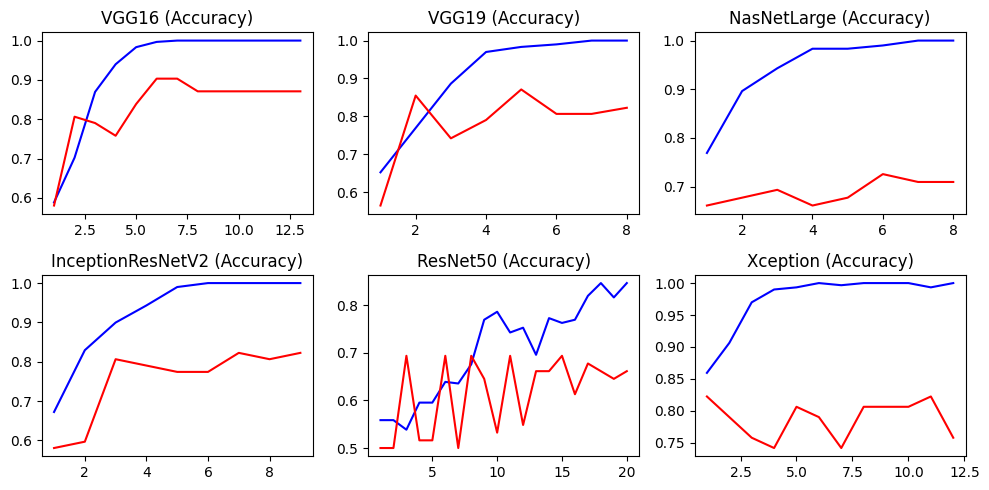

In [ ]:
# Definimos el tamaño de cada figura.
plt.figure(figsize=(10,5))

# Para VGG16
plt.subplot(2, 3, 1)

epochs = range(1, len(VGG16_s_acc) + 1)

plt.plot(epochs, VGG16_s_acc, 'b', label='Training acc')
plt.plot(epochs,VGG16_s_val_acc,'r', label='Validation acc')
plt.title('VGG16 (Accuracy)')

# Para VGG19
plt.subplot(2, 3, 2)

epochs = range(1, len(VGG19_s_acc) + 1)

plt.plot(epochs, VGG19_s_acc, 'b', label='Training acc')
plt.plot(epochs,VGG19_s_val_acc,'r', label='Validation acc')
plt.title('VGG19 (Accuracy)')

# Para NasNetLarge
plt.subplot(2, 3, 3)

epochs = range(1, len(NasNetLarge_s_acc) + 1)

plt.plot(epochs, NasNetLarge_s_acc, 'b', label='Training acc')
plt.plot(epochs,NasNetLarge_s_val_acc,'r', label='Validation acc')
plt.title('NasNetLarge (Accuracy)')

# Para InceptionResNetV2
plt.subplot(2, 3, 4)

epochs = range(1, len(InceptionResNetV2_s_acc) + 1)

plt.plot(epochs, InceptionResNetV2_s_acc, 'b', label='Training acc')
plt.plot(epochs,InceptionResNetV2_s_val_acc,'r', label='Validation acc')
plt.title('InceptionResNetV2 (Accuracy)')

# Para ResNet50
plt.subplot(2, 3, 5)

epochs = range(1, len(ResNet50_s_acc) + 1)

plt.plot(epochs, ResNet50_s_acc, 'b', label='Training acc')
plt.plot(epochs,ResNet50_s_val_acc,'r', label='Validation acc')
plt.title('ResNet50 (Accuracy)')

# Para Xception
plt.subplot(2, 3, 6)

epochs = range(1, len(Xception_s_acc) + 1)

plt.plot(epochs, Xception_s_acc, 'b', label='Training acc')
plt.plot(epochs,Xception_s_val_acc,'r', label='Validation acc')
plt.title('Xception (Accuracy)')

plt.tight_layout()
plt.show()

#### Loss

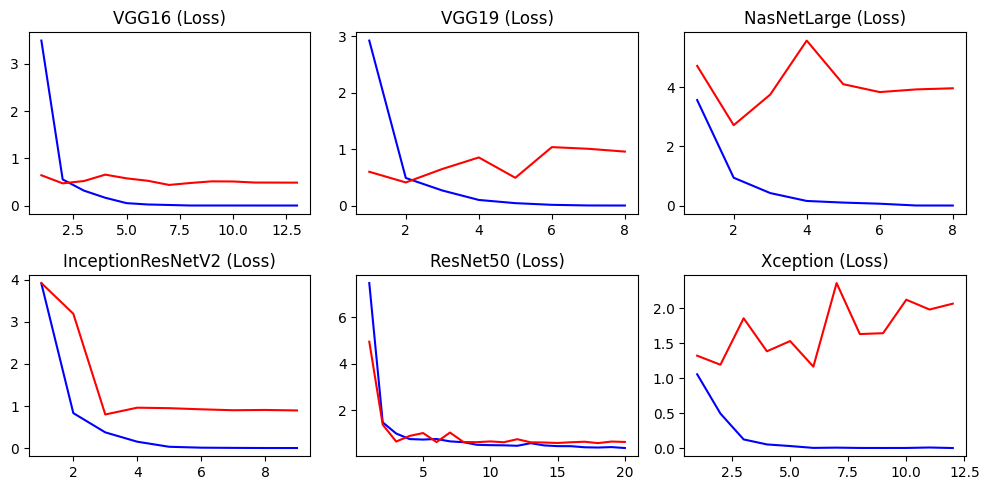

In [ ]:
# Definimos el tamaño de cada figura.
plt.figure(figsize=(10,5))

# Para VGG16
plt.subplot(2, 3, 1)

epochs = range(1, len(VGG16_s_loss) + 1)

plt.plot(epochs, VGG16_s_loss, 'b', label='Training loss')
plt.plot(epochs,VGG16_s_val_loss,'r', label='Validation loss')
plt.title('VGG16 (Loss)')

# Para VGG19
plt.subplot(2, 3, 2)

epochs = range(1, len(VGG19_s_loss) + 1)

plt.plot(epochs, VGG19_s_loss, 'b', label='Training loss')
plt.plot(epochs,VGG19_s_val_loss,'r', label='Validation loss')
plt.title('VGG19 (Loss)')

# Para NasNetLarge
plt.subplot(2, 3, 3)

epochs = range(1, len(NasNetLarge_s_loss) + 1)

plt.plot(epochs, NasNetLarge_s_loss, 'b', label='Training loss')
plt.plot(epochs,NasNetLarge_s_val_loss,'r', label='Validation loss')
plt.title('NasNetLarge (Loss)')

# Para InceptionResNetV2
plt.subplot(2, 3, 4)

epochs = range(1, len(InceptionResNetV2_s_loss) + 1)

plt.plot(epochs, InceptionResNetV2_s_loss, 'b', label='Training loss')
plt.plot(epochs,InceptionResNetV2_s_val_loss,'r', label='Validation loss')
plt.title('InceptionResNetV2 (Loss)')

# Para ResNet50
plt.subplot(2, 3, 5)

epochs = range(1, len(ResNet50_s_loss) + 1)

plt.plot(epochs, ResNet50_s_loss, 'b', label='Training loss')
plt.plot(epochs,ResNet50_s_val_loss,'r', label='Validation loss')
plt.title('ResNet50 (Loss)')

# Para Xception
plt.subplot(2, 3, 6)

epochs = range(1, len(Xception_s_loss) + 1)

plt.plot(epochs, Xception_s_loss, 'b', label='Training loss')
plt.plot(epochs,Xception_s_val_loss,'r', label='Validation loss')
plt.title('Xception (Loss)')

plt.tight_layout()
plt.show()

### Evaluación del modelo

In [ ]:
# Para VGG16
VGG16_s_test_loss, VGG16_s_test_acc = VGG16_s.evaluate(test_data)

# Para VGG19
VGG19_s_test_loss, VGG19_s_test_acc = VGG19_s.evaluate(test_data)

# Para NasNetLarge
NasNetLarge_s_test_loss, NasNetLarge_s_test_acc = NasNetLarge_s.evaluate(test_data)

# Para InceptionResNetV2
InceptionResNetV2_s_test_loss, InceptionResNetV2_s_test_acc = InceptionResNetV2_s.evaluate(test_data)

# Para ResNet50
ResNet50_s_test_loss, ResNet50_s_test_acc = ResNet50_s.evaluate(test_data)

# Para Xception
Xception_s_test_loss, Xception_s_test_acc = Xception_s.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - acc: 0.9091 - loss: 0.3965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - acc: 0.8636 - loss: 0.4751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - acc: 0.8182 - loss: 0.6435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - acc: 0.6818 - loss: 0.7694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - acc: 0.7273 - loss: 0.4519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - acc: 0.7727 - loss: 1.9316


In [ ]:
# Vemos cual ha sido la precisión para cada caso.
print('Precisión para VGG16:', VGG16_s_test_acc)
print('Precisión para VGG19:', VGG19_s_test_acc)
print('Precisión para NasNetLarge:', NasNetLarge_s_test_acc)
print('Precisión para InceptionResNetV2:', InceptionResNetV2_s_test_acc)
print('Precisión para ResNet50:', ResNet50_s_test_acc)
print('Precisión para Xception:', Xception_s_test_acc)

Precisión para VGG16: 0.9090909361839294
Precisión para VGG19: 0.8636363744735718
Precisión para NasNetLarge: 0.8181818127632141
Precisión para InceptionResNetV2: 0.6818181872367859
Precisión para ResNet50: 0.7272727489471436
Precisión para Xception: 0.7727272510528564


In [ ]:
# Look at confusion matrix
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ["Defective", "Non-Defective"])
    plt.yticks(tick_marks, ["Defective", "Non-Defective"], rotation=45)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

#### Conjunto completo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Text(0.5, 1.0, 'Xception')

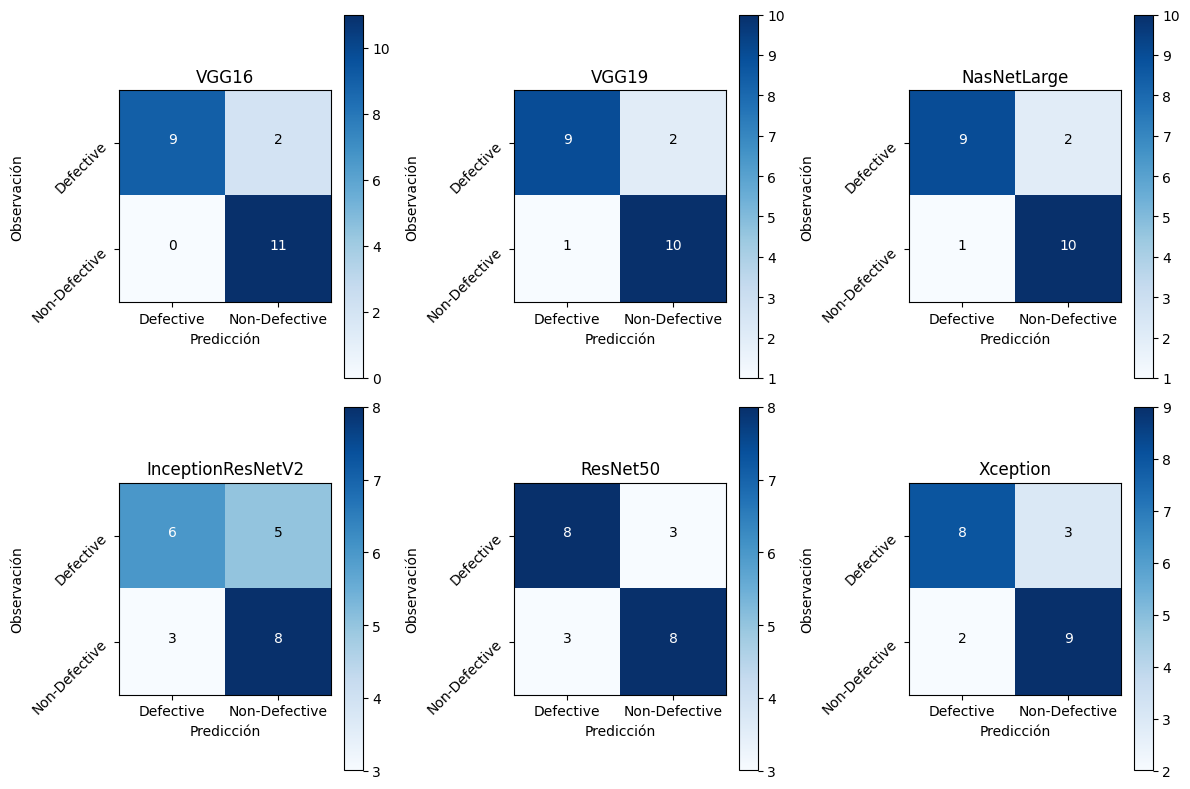

In [ ]:
# Definimos el tamaño de las imagenes
plt.figure(figsize=(12,8))

# Para VGG16

# Predict the values from the validation dataset
Y_pred = VGG16_s.predict(test_data)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_data.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 1)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('VGG16')

# Para VGG19

# Predict the values from the validation dataset
Y_pred = VGG19_s.predict(test_data)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_data.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 2)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('VGG19')

# Para NasNetLarge

# Predict the values from the validation dataset
Y_pred = NasNetLarge_s.predict(test_data)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_data.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 3)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('NasNetLarge')

# Para InceptionResNetV2

# Predict the values from the validation dataset
Y_pred = InceptionResNetV2_s.predict(test_data)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_data.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 4)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('InceptionResNetV2')

# Para ResNet50

# Predict the values from the validation dataset
Y_pred = ResNet50_s.predict(test_data)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_data.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 5)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('ResNet50')

#Para Xception

# Predict the values from the validation dataset
Y_pred = Xception_s.predict(test_data)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_data.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 6)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('Xception')